<a href="https://colab.research.google.com/github/NARAEIM/tp2-da/blob/imnarae/tp2_da_imnarae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# click_stream_df

**<click_stream_new 컬럼안내><p>**
session_id: 세션 아이디 <br>
event_name: 사건의 이름<br>
event_time: 사건이 일어난 시간<br>
event_id: 사건 아이디<br>
traffic_source: 접속 방법<br>
product_id: 물건 아이디<br>
quantitiy: 물건 개수<br>
item_price: 물건 가격<br>
payment_status: 결제 상태<br>
search_keywords: 검색 키워드<br>
promo_code: 프로모션 코드<br>
promo_amount: 프로모션을 통한 할인 가격

In [3]:
click_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/click_stream_new.csv')
click_df.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [4]:
click_df.columns


Index(['                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 session_id',
       'event_name', 'event_time', 'event_id', 'traffic_source', 'product_id',
       'quantity', 'item_price', 'payment_status', 'search_keywords',
       'promo_code', 'promo_amount'],
      dtype='object')

In [5]:
#컬럼명 공백제거
click_df.columns = click_df.columns.str.strip()


In [6]:
click_df['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE', nan],
      dtype=object)

In [7]:
click_df['promo_code'].value_counts()


AZ2022           5269
WEEKENDSERU      4001
BUYMORE          3860
XX2022           2560
WEEKENDMANTAP    1296
LIBURDONG        1294
STARTUP           690
SC2022            678
Name: promo_code, dtype: int64

In [8]:
click_df['promo_code'].isna().sum()

725940

# customer_df

**<customer 컬럼 안내><p>**
customer_id: 고객 아이디 <br>
first_name: 이름<br>
last_name: 성<br>
username: 유저 이름<br>
email: 이메일<br>
gender: 성별<br>
birthdate: 생일<br>
device_type: 기기 종류<br>
device_id: 장치 아이디<br>
device_version: 디바이스 버전<br>
home_location_lat: 집 위도<br>
home_location_long: 집 경도<br>
home_location: 집 위치<br>
home_country: 나라<br>
first_join_date: 처음 가입한 날짜


In [9]:
customer_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/customer.csv')
customer_df.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [11]:
customer_df['customer_id'].nunique()

100000

#transaction_df

**< transaction_df 컬럼 안내 >**<p>
created_at: 거래 발생 시간<br>
customer_id: 주문고객의 고유 식별자<br>
booking_id: 각 주문에 할당된 고유 식별자(한 고객이 여러 상품을 주문한 경우에도 각 주문은 별도의 booking_id를 가짐)<br>
session_id: 고객의 웹사이트 방문 세션(여러 주문이 같은 세션에서 발생했다면,  고객이 한 번의 웹사이트 방문 중에 여러 상품을 구매한 것)<br>
payment_method: 고객의 결제방법 (신용카드,  PayPal 등)<br>
payment_status: 결제 상태<br>
promo_amount: 주문에서 사용된 프로모션 또는 할인액<br>
promo_code: 사용한 프로모션 코드<br>
shipment_fee: 배송비<br>
shipment_date_limit: 상품이 배송되어야 하는 최종 날짜<br>
shipment_location_lat, shipment_location_long: 배송지의 위도와 경도<br>
total_amount: 주문 총 금액<br>
product_id: 주문된 제품의 고유 식별자<br>
quantity: 주문된 제품 수량<br>
item_price: 각 개별 제품 가격

In [12]:
transaction_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/transaction_new.csv')
transaction_df

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [13]:
transaction_df['booking_id'].value_counts()

b9d670fe-1ae0-4c79-b214-588225fd201e    51
8414d299-c1fd-4333-a622-00da2895703c    49
e7d064c8-2b57-479a-a848-d0046b3a2065    48
7750eee5-8968-4ed4-a557-91d7f03e08ce    48
1b77d403-c552-490f-a1e9-4f02634f56b0    43
                                        ..
cf0c2bcc-44bd-45f1-afbb-a12a09e17b25     1
509ce639-b44e-4e7e-a446-4517b4ebf54a     1
29edc5fb-a74a-4649-b7e2-f8e5caf0a195     1
fd80b729-d742-40cd-ae57-fcb0f8dd5d30     1
b242e188-5f94-4448-a038-c5865842374b     1
Name: booking_id, Length: 852584, dtype: int64

In [14]:
transaction_df['promo_code'].value_counts()

AZ2022           131312
BUYMORE           98373
WEEKENDSERU       91489
XX2022            65802
LIBURDONG         31084
WEEKENDMANTAP     30013
SC2022            16649
STARTUP           16417
Name: promo_code, dtype: int64

In [15]:
transaction_df['payment_status'].value_counts()

Success    1201035
Failed       53550
Name: payment_status, dtype: int64

# product_df(상품 카테코리 별 매출 비중 확인(Product 관점))

**< product_df 컬럼 안내 >**<p>
id : 제품의 고유id (transaction 데이터의 product_id 와 연결) <br>
gender : 제품의 타겟 성별<br>
masterCategory : 주 카테고리<br>
subCategory	: 부 카테고리<br>
articleType	: 세부유형(바지 중에서도 "청바지,슬랙스.." 이런식의 세부유형)<br>
baseColour	: 제품의 기본 색상<br>
season	: 출시 또는 판매 계절<br>
year	: 출시 연도<br>
usage	: 제품의 사용목적 또는 분야<br>
productDisplayName : 제품 표시 이름

In [16]:
product_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/product.csv')
product_df


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [17]:
product_df['id'].value_counts()

15970    1
58859    1
12881    1
22628    1
15298    1
        ..
44441    1
45593    1
36061    1
52524    1
51623    1
Name: id, Length: 44446, dtype: int64

In [18]:
product_df['gender'].value_counts()

Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: gender, dtype: int64

In [19]:
product_df['masterCategory'].value_counts()

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [20]:
product_df['subCategory'].value_counts()

Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1012
Sandal                        963
Wallets                       933
Flip Flops                    915
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   143
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

In [21]:
product_df['articleType'].value_counts()

Tshirts                7070
Shirts                 3217
Casual Shoes           2846
Watches                2542
Sports Shoes           2036
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: articleType, Length: 143, dtype: int64

In [22]:
product_df['baseColour'].value_counts()

Black                9732
White                5540
Blue                 4922
Brown                3494
Grey                 2741
Red                  2458
Green                2116
Pink                 1861
Navy Blue            1791
Purple               1643
Silver               1090
Yellow                779
Beige                 749
Gold                  629
Maroon                581
Orange                530
Olive                 410
Multi                 394
Cream                 390
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper                 86
Turquoise Blue         69
Rust                   66
Burgundy               45
Metallic               43
Coffee Brown           31
Mauve       

In [23]:
product_df['season'].value_counts()

Summer    21476
Fall      11445
Winter     8519
Spring     2985
Name: season, dtype: int64

In [24]:
product_df['usage'].value_counts()

Casual          34414
Sports           4025
Ethnic           3208
Formal           2359
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64

In [25]:
product_df['productDisplayName'].value_counts()

Lucera Women Silver Earrings                       82
Lucera Women Silver Pendant                        56
Lucera Women Silver Ring                           50
Catwalk Women Black Heels                          48
Q&Q Men Black Dial Watch                           42
                                                   ..
Spykar Men Navy Blue Trevor Brief                   1
Nike Mens White Polo T-shirt                        1
Belmonte Men Solid Blue Shirts                      1
Puma Men's Toe Crusher Black T-shirt                1
Fossil Women Pink Dial Chronograph Watch ES3050     1
Name: productDisplayName, Length: 31136, dtype: int64

In [26]:
product_df['year'].value_counts() # year : 제품생산(출시)연도로 가정, 제품 많은 순

2012.0    16290
2011.0    13689
2016.0     6007
2017.0     2917
2015.0     2780
2013.0     1213
2010.0      846
2018.0      405
2014.0      236
2019.0       33
2009.0       20
2008.0        7
2007.0        2
Name: year, dtype: int64

In [27]:
product_df['year'].value_counts().sort_index()# year : 제품생산(출시)연도로 가정, 연도 순

2007.0        2
2008.0        7
2009.0       20
2010.0      846
2011.0    13689
2012.0    16290
2013.0     1213
2014.0      236
2015.0     2780
2016.0     6007
2017.0     2917
2018.0      405
2019.0       33
Name: year, dtype: int64

In [28]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [29]:
# 여기서 year 컬럼을 int로 바꾸려 하니, 1개의 nan값으로 인해 불가

In [30]:
product_df.describe()

,id,year
count,44446.000000,44445.000000
mean,29692.631350,2012.805940
std,17048.234982,2.126401
min,1163.000000,2007.000000
25%,14770.250000,2011.000000
50%,28609.500000,2012.000000
75%,44678.750000,2015.000000
max,60000.000000,2019.000000


In [31]:
# 결측치 확인
product_df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [32]:
product_df['year'][product_df['year'].isnull()]

21285   NaN
Name: year, dtype: float64

In [33]:
product_df.loc[21285]

id                                                     53781
gender                                                   Men
masterCategory                                       Apparel
subCategory                                          Topwear
articleType                                          Tshirts
baseColour                                              Blue
season                                                   NaN
year                                                     NaN
usage                                                 Sports
productDisplayName    Puma Men Blue Sless Round Neck T-shirt
Name: 21285, dtype: object

In [34]:
#product_df['year'].astype(int)

##카테고리별 매출

In [35]:
product_df.rename(columns={'id': 'product_id'}, inplace=True)


# transaction,product 데이터를 'product_id' 컬럼 기준으로 병합
trans_prod_df = pd.merge(transaction_df, product_df, on='product_id')

# 각 상품의 매출액 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

# 상품 카테고리별 매출액 총합 .
category_sales = trans_prod_df.groupby(['masterCategory', 'subCategory'])['sales'].sum().reset_index()

trans_prod_df #병합프레임확인

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,sales
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,191247
1,2021-01-15T19:52:40.793729Z,82831,81f60282-96c5-45f5-8a24-18e8111ccd08,c7d4a5a2-362b-4042-a971-a55f84e0619f,OVO,Success,0,NaN,10000,2021-01-18T16:37:55.894009Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,222512
2,2020-06-04T14:54:13.726119Z,47013,a144e124-1ad6-425b-9f64-b01f05c697ff,141a3f3b-360e-4489-bc10-91528e9e1139,Gopay,Success,0,NaN,10000,2020-06-09T17:53:51.385567Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,245159
3,2019-02-05T08:29:50.613535Z,17135,e620a19d-982d-4fc2-9715-29fda7f42269,aadf43f6-59be-4b2f-9338-ccec0b2abf40,Credit Card,Success,0,NaN,0,2019-02-07T23:03:17.353912Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,263371
4,2020-11-04T14:20:44.351064Z,70185,bbe1053a-9738-4438-bea4-0a3abcaf6afb,ae213ea2-c5bb-45aa-8a27-820d33c873aa,Gopay,Success,0,NaN,10000,2020-11-09T16:53:37.994163Z,...,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,2403496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-01-15T14:09:04.388337Z,9486,a48ea0d8-617a-4ee0-9f4a-49c5ef9cf39a,848ef48a-d693-4677-bde7-8e7664c62319,Credit Card,Success,2179,AZ2022,10000,2021-01-19T16:21:12.504685Z,...,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,206624
1254581,2017-12-18T22:39:03.425067Z,30710,9a1520a1-a1c6-497e-93b5-7c8d87aa6f33,381feb63-e5ac-4cb4-823d-c7f1547c1be9,Gopay,Success,0,NaN,10000,2017-12-23T03:51:53.957263Z,...,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,370358
1254582,2022-03-14T22:04:05.857842Z,86532,ffa8ca45-82f3-4c62-85cc-c303c805590e,97c71ce8-e94c-4cf2-948a-1c80d871ed4d,Credit Card,Success,11957,XX2022,10000,2022-03-18T15:43:22.155994Z,...,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,217452
1254583,2020-09-11T01:57:40.983766Z,83374,a4b105ee-4dd6-4b32-9412-2e092e5bcda1,c98e89d1-5b19-456b-ab53-a7da4962a290,Credit Card,Success,0,NaN,10000,2020-09-16T02:36:59.288888Z,...,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2011.0,Sports,Puma Men's Future Cat Engine Black Shoe,444310


In [36]:
trans_prod_df['promo_code'].value_counts()

AZ2022           131312
BUYMORE           98373
WEEKENDSERU       91489
XX2022            65802
LIBURDONG         31084
WEEKENDMANTAP     30013
SC2022            16649
STARTUP           16417
Name: promo_code, dtype: int64

In [37]:
trans_prod_df['promo_code'].isna().value_counts()

True     773446
False    481139
Name: promo_code, dtype: int64

In [38]:
category_sales

,masterCategory,subCategory,sales
0,Accessories,Accessories,1484400001
1,Accessories,Bags,31947975167
2,Accessories,Belts,8507021121
3,Accessories,Cufflinks,1061167155
4,Accessories,Eyewear,11175937421
5,Accessories,Gloves,210814581
6,Accessories,Headwear,3134153428
7,Accessories,Jewellery,11316396781
8,Accessories,Mufflers,372670021
9,Accessories,Perfumes,9710740


In [39]:
# 'created_at' 컬럼 datetime 형태로 변환
trans_prod_df['created_at'] = pd.to_datetime(trans_prod_df['created_at'])

# 월별 매출 확인을 위해 월별로 그룹화('created_at'에서 연도와 월만 추출)
trans_prod_df['month'] = trans_prod_df['created_at'].dt.to_period('M')

# 'product_id', 'month', 'masterCategory', 'subCategory' 그룹화, 매출액을 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

category_sales = trans_prod_df.groupby(['month', 'masterCategory', 'subCategory'])['sales'].sum().reset_index()
category_sales

,month,masterCategory,subCategory,sales
0,2016-06,Apparel,Topwear,630795
1,2016-07,Accessories,Accessories,753086
2,2016-07,Accessories,Bags,14839440
3,2016-07,Accessories,Belts,1884556
4,2016-07,Accessories,Cufflinks,191523
...,...,...,...,...
3082,2022-07,Personal Care,Nails,121952656
3083,2022-07,Personal Care,Skin,19002037
3084,2022-07,Personal Care,Skin Care,19659991
3085,2022-07,Sporting Goods,Sports Equipment,4338441


In [40]:
# 'created_at' 컬럼을 datetime 형태로 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])
transaction_df
# 월별 그룹화. 각 행의 'created_at' 값에서 연도와 월만 추출
transaction_df['month'] = transaction_df['created_at'].dt.to_period('M')

# 'product_id', 'month', 'masterCategory', 'subCategory' 그룹화, 매출액을 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

category_sales = trans_prod_df.groupby(['month', 'masterCategory', 'subCategory'])['sales'].sum().reset_index()


In [41]:
category_sales['subCategory'].value_counts()

Socks                       136
Topwear                      74
Dress                        73
Skin                         73
Nails                        73
Makeup                       73
Lips                         73
Fragrance                    73
Accessories                  73
Shoes                        73
Sandal                       73
Flip Flops                   73
Saree                        73
Loungewear and Nightwear     73
Innerwear                    73
Free Gifts                   73
Bottomwear                   73
Headwear                     73
Watches                      73
Bags                         73
Cufflinks                    73
Eyewear                      73
Belts                        73
Jewellery                    73
Scarves                      73
Stoles                       73
Ties                         73
Wallets                      73
Skin Care                    72
Perfumes                     72
Apparel Set                  71
Mufflers

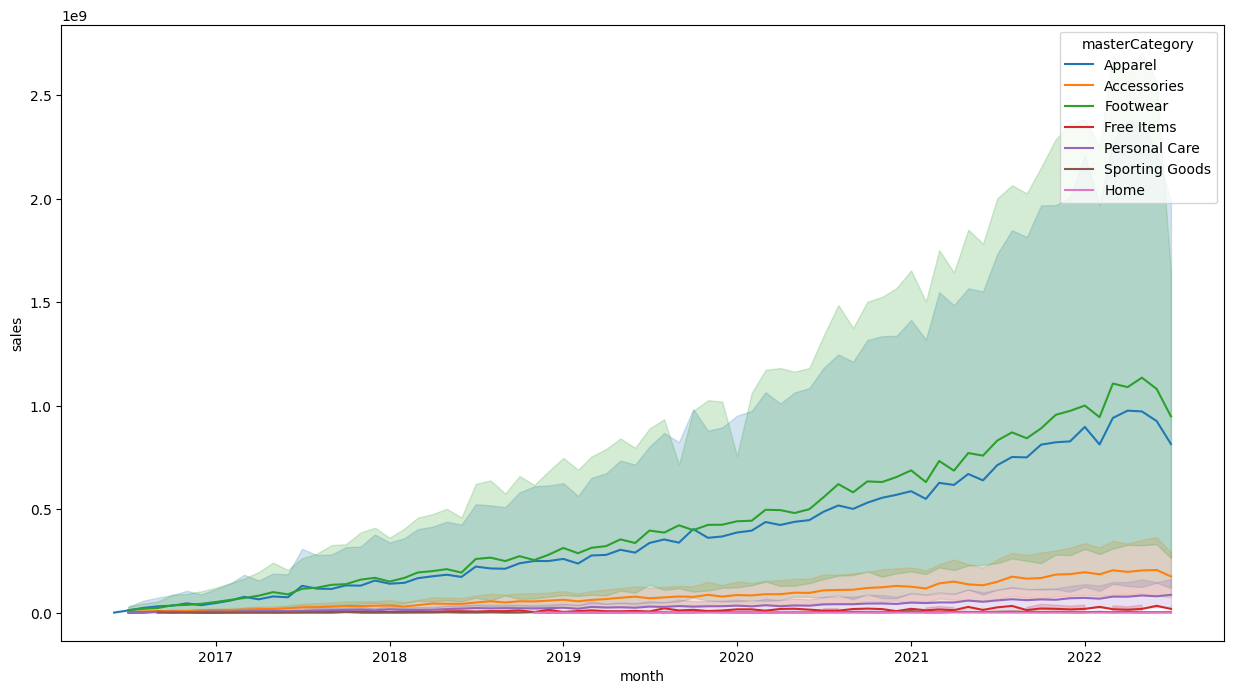

In [42]:

category_sales['month'] = category_sales['month'].dt.to_timestamp()


plt.figure(figsize=(15, 8))


sns.lineplot(data=category_sales, x='month', y='sales', hue='masterCategory')


plt.show()



In [43]:
print(category_sales['month'].dtypes)
print(category_sales['sales'].dtypes)
print(category_sales['masterCategory'].dtypes)


datetime64[ns]
int64
object


##성별(제품군)에 따른 매출

In [44]:
# 성별(제품군)에 따른 상품판매량 및 매출 
product_df.rename(columns={'id': 'product_id'}, inplace=True)
# transaction,product 데이터를 'product_id' 컬럼 기준으로 병합
trans_prod_df = pd.merge(transaction_df, product_df, on='product_id')

# 각 상품의 매출액 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

# 성별(제품군)에 따른 매출액 및 판매횟수 총합 .
gender_sales = trans_prod_df.groupby('gender').agg({'sales': 'sum', 'product_id': 'count'}).reset_index()
gender_sales.rename(columns={'sales': 'total_sales', 'product_id': 'sales_count'}, inplace=True)

gender_product_cnt = product_df['gender'].value_counts().reset_index()
gender_product_cnt.columns = ['gender', 'product_count']

# 'gender_sales' 데이터프레임에 'product_count'를 병합
gender_sales = pd.merge(gender_sales, gender_product_cnt, on='gender')
gender_sales

# 성별, 총 판매액, 총 판매 횟수, 등록된 제품 수 

,gender,total_sales,sales_count,product_count
0,Boys,8708916491,23543,830
1,Girls,6635897551,18284,655
2,Men,231170204375,625224,22165
3,Unisex,22406211396,60610,2164
4,Women,193834865342,526924,18632


##계절(제품군)에 따른 매출

In [45]:
# 계절(제품군)에 따른 매출액 및 판매횟수 총합 .
seaason_sales = trans_prod_df.groupby('season').agg({'sales': 'sum', 'product_id': 'count'}).reset_index()
seaason_sales.rename(columns={'sales': 'total_sales', 'product_id': 'sales_count'}, inplace=True)

season_product_cnt = product_df['season'].value_counts().reset_index()
season_product_cnt.columns = ['season', 'product_count']

# 'season_sales' 데이터프레임에 'product_count'를 병합
seaason_sales = pd.merge(seaason_sales, season_product_cnt, on='season')
seaason_sales

# 계절, 총 판매액, 총 판매 횟수, 등록된 제품 수 

,season,total_sales,sales_count,product_count
0,Fall,118983392307,322237,11445
1,Spring,31013170952,84368,2985
2,Summer,223802235690,606432,21476
3,Winter,88736919265,240945,8519


##월별 매출 합계

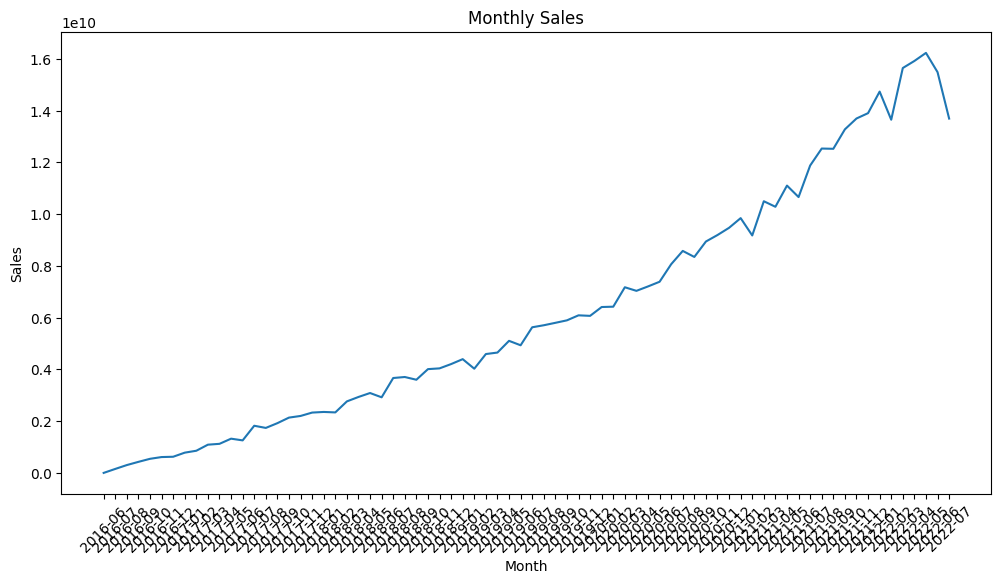

In [46]:
# 월별 매출

# 'created_at' 컬럼 datetime 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 월 추출
transaction_df['month'] = transaction_df['created_at'].dt.to_period('M')

# 각 상품 매출액
transaction_df['sales'] = transaction_df['item_price'] * transaction_df['quantity']

# 월별 매출액
monthly_sales = transaction_df.groupby('month')['sales'].sum().reset_index()
monthly_sales

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.show()


In [47]:
monthly_sales

,month,sales
0,2016-06,630795
1,2016-07,153982902
2,2016-08,303353575
3,2016-09,427522409
4,2016-10,544857304
...,...,...
69,2022-03,15646434700
70,2022-04,15918800924
71,2022-05,16230749832
72,2022-06,15486574070


##연도별 매출 합계

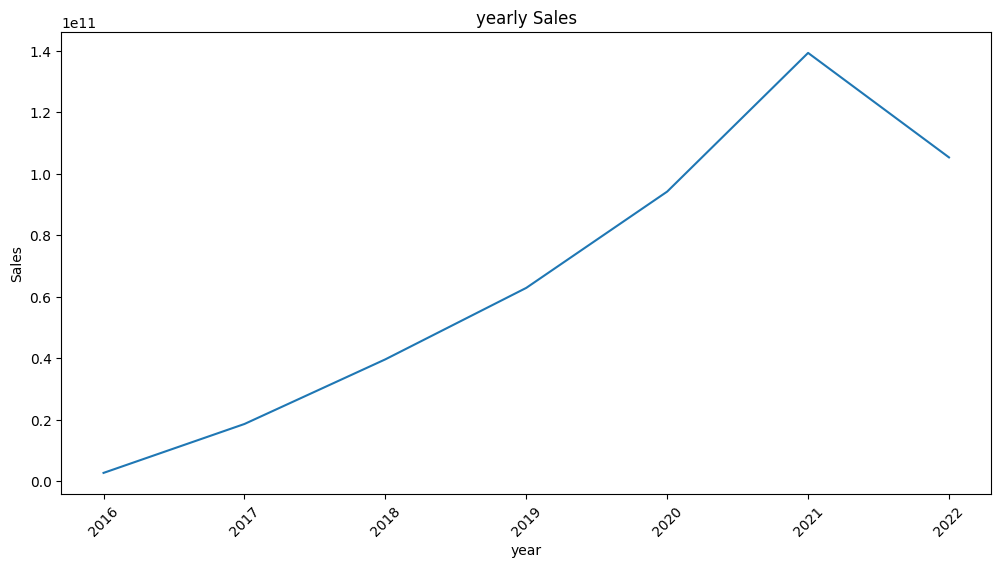

In [48]:
# 연도별 매출 합

# 'created_at' 컬럼 datetime 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.to_period('Y')

# 각 상품 매출액
transaction_df['sales'] = transaction_df['item_price'] * transaction_df['quantity']

# 연도별 매출액
yearly_sales = transaction_df.groupby('year')['sales'].sum().reset_index()
yearly_sales

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['year'].astype(str), yearly_sales['sales'])
plt.xlabel('year')
plt.ylabel('Sales')
plt.title('yearly Sales')
plt.xticks(rotation=45)
plt.show()

##연도별 매출 평균

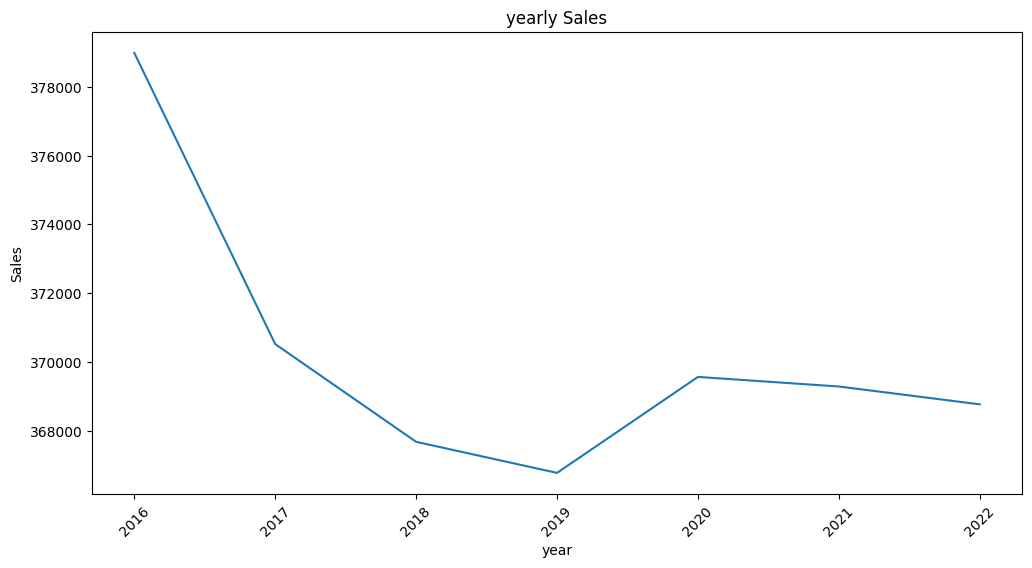

In [49]:
# 연도별 매출 평균
 
# 'created_at' 컬럼 datetime 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.to_period('Y')

# 각 상품 매출액
transaction_df['sales'] = transaction_df['item_price'] * transaction_df['quantity']

# 연도별 매출액 평균
yearly_sales = transaction_df.groupby('year')['sales'].mean().reset_index()
yearly_sales

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['year'].astype(str), yearly_sales['sales'])
plt.xlabel('year')
plt.ylabel('Sales')
plt.title('yearly Sales')
plt.xticks(rotation=45)
plt.show()

## 연도별 구매 건수

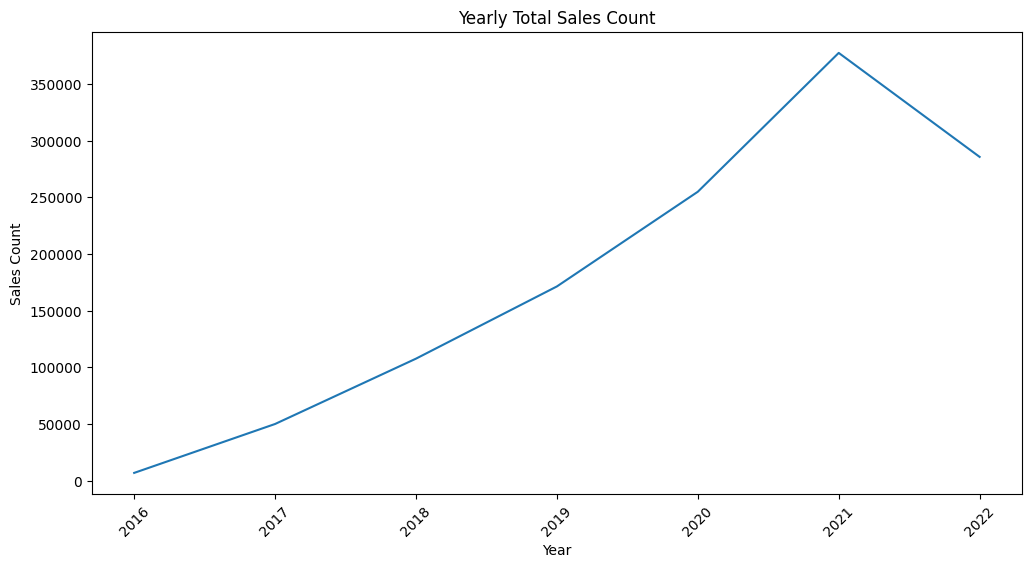

In [50]:
#연도별 구입 건수
# 'created_at' 컬럼 datetime 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.year

# 연도별 총 구입 건수 계산
yearly_total_sales = transaction_df.groupby('year').size().reset_index()
yearly_total_sales.columns = ['year', 'sales_cnt']

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_total_sales['year'], yearly_total_sales['sales_cnt'])
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Yearly Total Sales Count')
plt.xticks(rotation=45)
plt.show()

In [51]:
yearly_total_sales


,year,sales_cnt
0,2016,7039
1,2017,50171
2,2018,107789
3,2019,171472
4,2020,254983
5,2021,377427
6,2022,285704


##나이(출생연도)에 따른 제품 구매 추이

In [52]:
pd.set_option('display.max_rows', None)

In [53]:
# 나이(출생연도)에 따른 제품 구매 추이

# 'birthdate' 컬럼 datetime 변환
customer_df['birthdate'] = customer_df['birthdate'].astype(str)
customer_df['birthdate'] = pd.to_datetime(customer_df['birthdate'], errors='coerce')

# 연도 추출
customer_df['year'] = customer_df['birthdate'].dt.year

# transation,customer 데이터를 'customer_id' 컬럼 기준으로 병합
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = trans_cust_df['item_price'] * trans_cust_df['quantity']

# 나이(출생연도)에 따른 매출액 및 판매횟수 총합 .
age_sales = trans_cust_df.groupby('year_y').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
age_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)

age_sales


# 출생연도, 총 판매액, 총 판매 횟수

,year_y,total_sales,sales_count
0,1954,3475621,12
1,1955,8390392,20
2,1957,9437562,20
3,1959,762196,4
4,1960,5703343,15
5,1961,4105001,13
6,1962,6573519,19
7,1963,55171476,171
8,1964,9425402,10
9,1965,39360772,115


In [54]:
trans_cust_df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,year_y
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2000
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,...,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,...,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,...,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996


In [55]:
age_sales.describe()

,year_y,total_sales,sales_count
count,61.000000,6.100000e+01,61.000000
mean,1985.918033,7.586165e+09,20566.967213
std,17.893477,9.134113e+09,24764.593160
min,1954.000000,7.621960e+05,4.000000
25%,1971.000000,1.163119e+08,342.000000
50%,1986.000000,2.142914e+09,5693.000000
75%,2001.000000,1.483570e+10,39980.000000
max,2016.000000,2.623339e+10,71272.000000


In [56]:
# 'year_y'를 'birth_year'로 변경
customer_df.rename(columns={'year_y': 'birth_year'}, inplace=True)
customer_df.rename(columns={'year': 'birth_year'}, inplace=True)

In [57]:
customer_df.columns

Index(['customer_id', 'first_name', 'last_name', 'username', 'email', 'gender',
       'birthdate', 'device_type', 'device_id', 'device_version',
       'home_location_lat', 'home_location_long', 'home_location',
       'home_country', 'first_join_date', 'birth_year'],
      dtype='object')

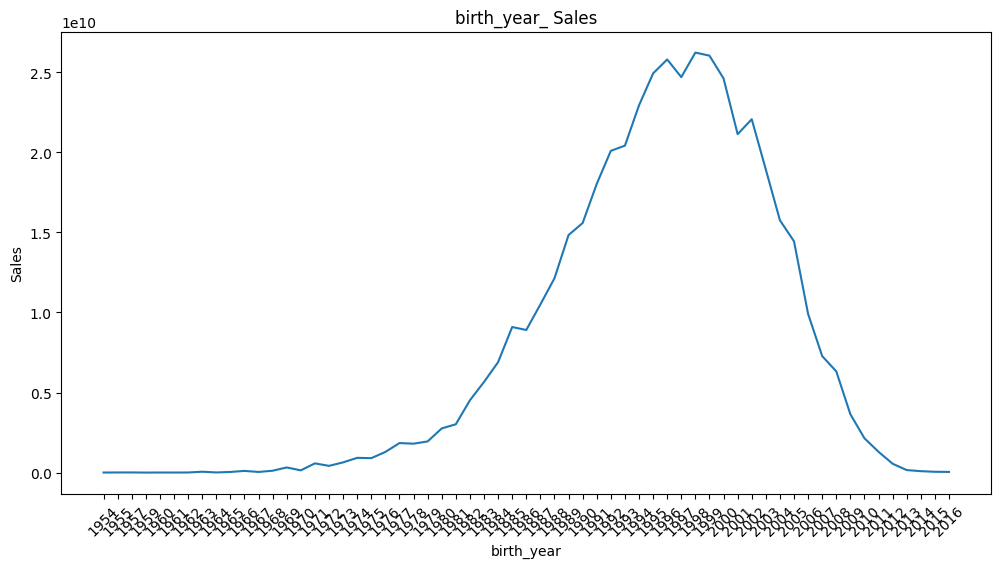

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(age_sales['year_y'].astype(str), age_sales['total_sales'])
plt.xlabel('birth_year')
plt.ylabel('Sales')
plt.title('birth_year_ Sales')
plt.xticks(rotation=45)
plt.show()

In [59]:
# 1984년생 나이 : 40 >39
# 1987년생 나이 : 35>34
# 2009년생 나이 : 15

In [60]:
# 'id'를 'product_id'로 변경
product_df.rename(columns={'id': 'product_id'}, inplace=True)

# transaction 데이터와 product 데이터를 병합
data = pd.merge(transaction_df, product_df, on='product_id')

# 'created_at' 컬럼에서 연도 추출
data['year'] = pd.to_datetime(data['created_at']).dt.year

# 연도와 카테고리로 그룹화하고, 각 그룹에서 판매량과 매출액 계산
result = data.groupby(['year', 'masterCategory','subCategory','usage']).agg({
    'quantity': 'sum',
    'total_amount': 'sum'
}).reset_index()

# 각 연도에서 판매량이 가장 높은 카테고리 찾기
idx = result.groupby(['year'])['quantity'].transform(max) == result['quantity']
most_sold = result[idx]

most_sold


,year,masterCategory,subCategory,usage,quantity,total_amount
49,2016,Apparel,Topwear,Casual,2699,2223476175
137,2017,Apparel,Topwear,Casual,18797,14919820325
244,2018,Apparel,Topwear,Casual,39581,32702902499
352,2019,Apparel,Topwear,Casual,62251,49009143305
462,2020,Apparel,Topwear,Casual,93943,75732674162
572,2021,Apparel,Topwear,Casual,138898,110541645393
682,2022,Apparel,Topwear,Casual,105143,83396800957


In [61]:
# 'created_at' 컬럼에서 연도 추출
data['year'] = pd.to_datetime(data['created_at']).dt.year

# 연도, 카테고리, 하위 카테고리, 용도로 그룹화하고, 각 그룹에서 판매량과 매출액 계산
result = data.groupby(['year', 'masterCategory']).agg({
    'quantity': 'sum',
    'total_amount': 'sum'
}).reset_index()

# 각 연도에서 판매량이 가장 높은 카테고리 찾기
top5_categories = result.groupby('year').apply(lambda x: x.nlargest(5, 'quantity')).reset_index(drop=True)

top5_categories


,year,masterCategory,quantity,total_amount
0,2016,Apparel,5109,4198349632
1,2016,Accessories,2814,2232780034
2,2016,Footwear,2061,1731769069
3,2016,Personal Care,586,405082870
4,2016,Free Items,39,25834904
5,2017,Apparel,35827,28308200012
6,2017,Accessories,19157,14870822863
7,2017,Footwear,15336,12282672945
8,2017,Personal Care,4144,3313499349
9,2017,Free Items,171,136834610


In [62]:
# Apparel > Accessories > Footwear > Personal Care >	Free Items
# 인기카테고리 top5는 모든 연도 동일함 

In [63]:
print(data['created_at'].dt.tz)
data['created_at'] = data['created_at'].dt.tz_convert(None)


UTC


##RFM 분석

**RFM (Recency, Frequency, Monetary)<br>**
고객의 최근 거래 기록, 거래 빈도, 거래 금액을 기반으로 고객 분류. 각 고객에게 RFM 점수를 부여하여 세그먼트 형성<p>

- Recency: 거래의 최근성. 가장 최근에 구매한 날짜로부터 현재까지의 기간
- Frequency: 거래 빈도. 총 거래 횟수
- Monetary: 거래 금액. 고객이 구매한 총 금액

In [64]:
# 'created_at'를 datetime 타입으로 변환
data['created_at'] = pd.to_datetime(data['created_at'])

# 현재 날짜 설정
# snapshot_date : RFM 분석을 수행하는 현재 날짜(분석의 기준점)
snapshot_date = pd.to_datetime("2022-08-01")

# Recency 계산: 오늘 날짜 - 가장 최근 구매 날짜
rfm_df = data.groupby('customer_id').agg({
    'created_at': lambda x: (snapshot_date - x.max()).days,
    'booking_id': 'count',
    'total_amount': 'sum'
})

# 컬럼 이름 변경
rfm_df.rename(columns={
    'created_at': 'Recency',
    'booking_id': 'Frequency',
    'total_amount': 'Monetary'
}, inplace=True)

rfm_df.head()


,Recency,Frequency,Monetary
customer_id,,,
3,35,71,45842098
8,77,8,4758601
9,64,8,4113630
11,146,1,197533
15,207,9,6447246


In [65]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 3 to 99999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    50705 non-null  int64
 1   Frequency  50705 non-null  int64
 2   Monetary   50705 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [66]:
rfm_df.describe().round(2)

,Recency,Frequency,Monetary
count,50705.00,50705.00,5.070500e+04
mean,299.08,24.74,2.923547e+07
std,436.19,44.20,6.426486e+07
min,0.00,1.00,2.745000e+04
25%,39.00,2.00,9.094500e+05
50%,110.00,8.00,5.144328e+06
75%,359.00,27.00,2.691191e+07
max,2221.00,807.00,1.116077e+09


##연도별 유입 고객 수

In [67]:
# 'first_join_date' 컬럼을 datetime 타입으로 변환
customer_df['first_join_date'] = pd.to_datetime(customer_df['first_join_date'])

# 'first_join_date'에서 연도 추출
customer_df['join_year'] = customer_df['first_join_date'].dt.year

# 연도별 유입 고객 수 계산
new_customers_by_year = customer_df['join_year'].value_counts().sort_index()

print(new_customers_by_year)


2016     4729
2017    11440
2018    13587
2019    15303
2020    17821
2021    22760
2022    14360
Name: join_year, dtype: int64


In [68]:
# # 데이터 프레임 준비
# rfm_customer = data.groupby('customer_id').agg({
#     'created_at': [lambda x: (snapshot_date - x.max()).days, 'min', 'max'],
#     'booking_id': 'count',
#     'total_amount': 'sum'
# }).reset_index()

# # 컬럼명 설정
# rfm_customer.columns = ['customer_id', 'Recency', 'First_Purchase', 'Last_Purchase', 'Frequency', 'Monetary']

# # First_Purchase와 Last_Purchase를 snapshot_date로부터의 일수로 변경
# rfm_customer['First_Purchase'] = (snapshot_date - rfm_customer['First_Purchase']).dt.days
# rfm_customer['Last_Purchase'] = (snapshot_date - rfm_customer['Last_Purchase']).dt.days

# # 마지막 접속일자를 추가
# last_session = click_df.groupby('customer_id')['event_time'].max()
# rfm_customer = rfm_customer.join(last_session, on='customer_id')
# rfm_customer['Last_Session'] = (snapshot_date - rfm_customer['event_time']).dt.days
# rfm_customer.drop(columns=['event_time'], inplace=True)

# rfm_customer

## 구매 건 당 매출(평균 주문 가치,AOV)

In [69]:
# 평균 주문 가치(Average Order Value, AOV)
# 전체 매출/전체 주문 건수  => 고객 한 명이 한 번의 구매로 얼마나 많은 돈을 소비하는지에 대한 지표

# 총 매출 계산
total_sales = ((transaction_df['item_price']-transaction_df['promo_amount']) * transaction_df['quantity']).sum()

# 총 구매 건수 계산
total_orders = transaction_df['booking_id'].nunique()

# 구매 건 당 매출액 계산
revenue_per_order = total_sales / total_orders
revenue_per_order

538323.8933090464

In [70]:
# 각 구매 건에 대한 매출액 계산
transaction_df['sales_per_order'] = (transaction_df['item_price']-transaction_df['promo_amount']) * transaction_df['quantity']
sales_per_order = transaction_df.groupby('booking_id')['sales_per_order'].sum()

sales_per_order.describe().round(2)

count      852584.00
mean       538323.89
std        809573.35
min          7515.00
25%        194727.00
50%        293327.00
75%        503285.75
max      23494487.00
Name: sales_per_order, dtype: float64

## 객단가 

### 건별 객단가

In [71]:
# 각 구매 건 별 객단가 =  transaction_df['total_amount']
transaction_df['total_amount'].describe()

count    1.254585e+06
mean     1.181574e+06
std      1.728940e+06
min      1.089800e+04
25%      2.466450e+05
50%      4.558770e+05
75%      1.360496e+06
max      2.350449e+07
Name: total_amount, dtype: float64

### 고객별 객단가

In [72]:
# 고객별 총 매출액
customer_total_sales = transaction_df.groupby('customer_id')['total_amount'].sum()

# 고객별 주문 수
customer_total_orders = transaction_df.groupby('customer_id')['booking_id'].nunique()

# 객단가 계산 : 한 고객이 한번 주문할 때의 평균 금액
average_sales_per_order = customer_total_sales / customer_total_orders

# 고객별 총 매출액 출력
customer_total_sales_df = customer_total_sales.to_frame()
customer_total_sales_df.head()

,total_amount
customer_id,
3,45842098
8,4758601
9,4113630
11,197533
15,6447246


In [73]:
# 고객별 총 주문 수 출력
customer_total_orders_df = customer_total_orders.to_frame()
customer_total_orders_df.head()

,booking_id
customer_id,
3,51
8,7
9,6
11,1
15,5


In [74]:
# 객단가 출력
average_sales_per_order_df = average_sales_per_order.to_frame()
average_sales_per_order_df.rename(columns={0:'객단가'}, inplace=True)
average_sales_per_order_df.head()


,객단가
customer_id,
3,8.988647e+05
8,6.798001e+05
9,6.856050e+05
11,1.975330e+05
15,1.289449e+06


In [75]:
# 출력형식 지정(소수점 둘째자리까지)
# (참고) mean 1703249 루피아 = 148,151원
pd.options.display.float_format = '{:.2f}'.format
average_sales_per_order.describe()

count       50705.00
mean      1703249.24
std       4676116.04
min         27450.00
25%        343055.00
50%        729007.67
75%       1590872.44
max     261113086.00
dtype: float64

### 기간별 객단가

In [76]:
# 연도별 객단가
# created_at 컬럼 => datetime 형식으로 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.year

# 거래별 총 지출액 계산 (item_price * quantity)-promo_amount : 배송비 제외한 총 금액
transaction_df['total_spent'] = transaction_df['total_amount'] - transaction_df['promo_amount']

# 각 주문별 객단가 계산 (총 지출액 / 주문 횟수)
transaction_df['avg_sales_per_order'] = transaction_df.groupby('booking_id')['total_spent'].transform('sum') / transaction_df.groupby('booking_id')['booking_id'].transform('count')

# 연도별 평균 객단가 계산
avg_sales_per_order_year = transaction_df.groupby('year')['avg_sales_per_order'].mean()
avg_sales_per_order_year.to_frame()


,avg_sales_per_order
year,
2016,1218764.43
2017,1172499.25
2018,1195132.43
2019,1155368.98
2020,1190651.29
2021,1182606.49
2022,1174409.10


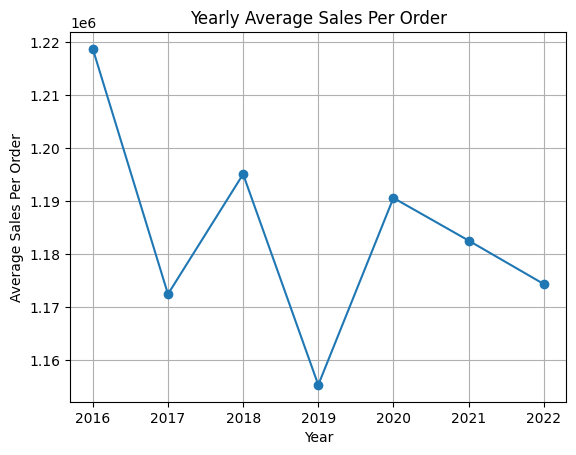

In [77]:
avg_sales_per_order_year.plot(kind='line', marker='o')

plt.title('Yearly Average Sales Per Order')
plt.xlabel('Year')
plt.ylabel('Average Sales Per Order')
plt.grid(True)
plt.show()

### 구매 카테고리별 객단가

In [122]:
# customer_id 별 카테고리 구매에 따른 분석
# transaction_df와 product_df 병합
trans_prod_df = pd.merge(transaction_df, product_df, left_on='product_id', right_on='product_id')

# 각 고객의 카테고리별 총 구매 금액 계산
trans_prod_df['total_amount'] = (trans_prod_df['item_price'] * trans_prod_df['quantity'] - trans_prod_df['promo_amount'])

# 각 고객의 카테고리별 총 구매 금액 및 상품 수를 계산
customer_category = trans_prod_df.groupby(['customer_id', 'masterCategory']).agg({'total_amount': 'sum', 'quantity': 'sum'}).reset_index()

# 객단가 계산 (총 구매 금액 / 상품 수)
customer_category['avg_amount_per_item'] = customer_category['total_amount'] / customer_category['quantity']
customer_category.head(20)


,customer_id,masterCategory,total_amount,quantity,avg_amount_per_item
0,3,Accessories,4376463,22,198930.14
1,3,Apparel,12222818,46,265713.43
2,3,Footwear,2047450,10,204745.00
3,3,Personal Care,2201843,10,220184.30
4,8,Apparel,2445691,14,174692.21
5,8,Footwear,285990,1,285990.00
6,8,Free Items,223431,1,223431.00
7,8,Personal Care,898449,3,299483.00
8,9,Accessories,733767,2,366883.50
9,9,Apparel,1715247,7,245035.29


In [123]:
# 카테고리별 객단가
# masterCategory 별 총 구매 금액 계산
category_total_amount = trans_prod_df.groupby('masterCategory')['total_amount'].sum()

# masterCategory 별 구매한 고객 수 계산
category_customer_count = trans_prod_df.groupby('masterCategory')['customer_id'].nunique()

# 객단가 계산 (총 구매 금액 / 고객 수)
category_avg_per_customer = category_total_amount / category_customer_count

category_avg_per_customer


masterCategory
Accessories      3057453.00
Apparel          5000374.10
Footwear         2624143.78
Free Items        405586.48
Home              353249.42
Personal Care    1087004.85
Sporting Goods    358641.84
dtype: float64

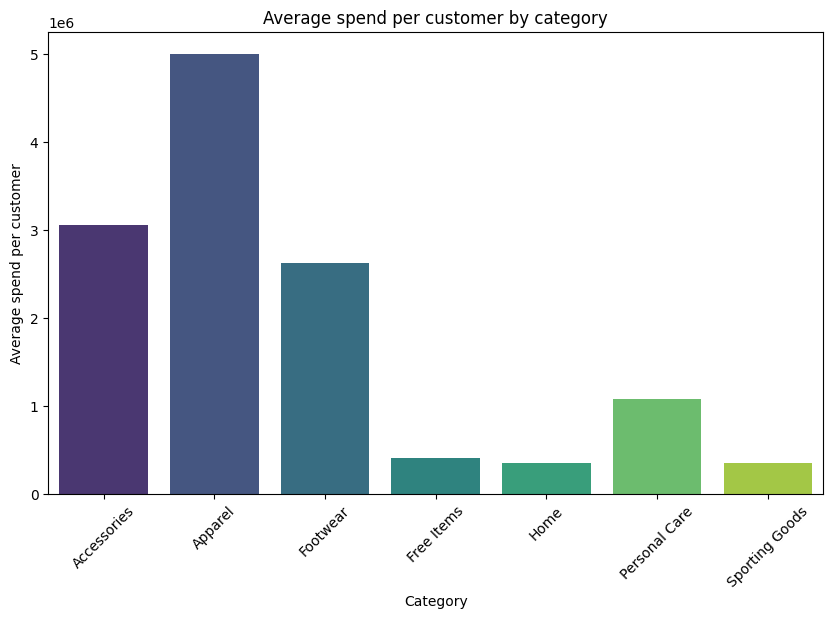

In [125]:
# 'category_avg_per_customer' 그래프
plt.figure(figsize=(10,6))
sns.barplot(x=category_avg_per_customer.index, y=category_avg_per_customer.values, palette='viridis')
plt.title('Average spend per customer by category')
plt.xlabel('Category')
plt.ylabel('Average spend per customer')
plt.xticks(rotation=45)
plt.show()

### 구매 횟수별 객단가

In [131]:
# 고객별 총 구매금액 및 구매횟수 계산
customer_total_amount = trans_prod_df.groupby('customer_id')['total_amount'].sum()
customer_purchase_count = trans_prod_df.groupby('customer_id')['customer_id'].count()
customer_df = pd.DataFrame({'total_amount': customer_total_amount, 'purchase_count': customer_purchase_count})

# 구매횟수별로 그룹화하고, 객단가(총 구매금액/ 고객수)
purchase_count_avg_amount = customer_df.groupby('purchase_count')['total_amount'].sum() / customer_df.groupby('purchase_count').size()
purchase_count_avg_amount



purchase_count
1        365101.02
2        737658.22
3       1115384.72
4       1453626.59
5       1821779.19
6       2233962.02
7       2594441.28
8       2970609.25
9       3235160.48
10      3716449.62
11      4017270.50
12      4402984.31
13      4672928.48
14      5151408.27
15      5549582.80
16      5813984.92
17      6233096.00
18      6626690.38
19      7050847.60
20      7461561.94
21      7637104.43
22      7937162.70
23      8482429.28
24      8652129.40
25      9235676.25
26      9689629.65
27     10002143.64
28     10361100.77
29     10602779.41
30     11038137.53
31     11294233.25
32     11734562.41
33     12309075.22
34     12284383.65
35     13022368.96
36     13114957.55
37     13521901.48
38     14314022.51
39     14462316.32
40     14405043.00
41     15006764.51
42     15335690.98
43     15859102.73
44     15991518.38
45     16502381.62
46     17162260.21
47     17151405.88
48     17577426.62
49     18368450.79
50     18465525.94
51     18242047.36
52     19072792.

In [133]:
# 구매 횟수 별 고객 수
customer_df.groupby('purchase_count').size()

purchase_count
1      8474
2      4523
3      3220
4      2532
5      2010
6      1776
7      1553
8      1378
9      1228
10     1083
11      992
12      966
13      883
14      768
15      745
16      678
17      652
18      581
19      575
20      559
21      494
22      531
23      478
24      444
25      388
26      389
27      369
28      350
29      328
30      311
31      313
32      292
33      295
34      264
35      242
36      241
37      250
38      244
39      206
40      242
41      220
42      205
43      207
44      178
45      196
46      164
47      185
48      165
49      180
50      160
51      162
52      138
53      142
54      153
55      125
56      157
57      128
58      115
59      116
60      103
61      112
62      128
63      113
64      103
65      106
66      106
67       97
68       84
69       80
70       91
71       79
72       82
73       78
74       89
75       65
76       62
77       82
78       60
79       79
80       64
81       73
82       58
8

## 고객 구매 패턴 분석(AOV&객단가 비교)

In [78]:
aov_sales_df = customer_total_sales_df.merge(average_sales_per_order_df, on='customer_id')
aov_sales_df.rename(columns={0:'객단가'}, inplace=True)
aov_sales_df.head()

,total_amount,객단가
customer_id,,
3,45842098,898864.67
8,4758601,679800.14
9,4113630,685605.00
11,197533,197533.00
15,6447246,1289449.20


In [79]:
#pattern = 1  : total_amount > 객단가  : 한 번의 구매에 많은 수량의 상품을 구매하는 경향이 있는 고객
#pattern = 0  : total_amount < 객단가
aov_sales_df['pattern'] = np.where(aov_sales_df['total_amount'] > aov_sales_df['객단가'], 1, 0)
aov_sales_df.head()

,total_amount,객단가,pattern
customer_id,,,
3,45842098,898864.67,1
8,4758601,679800.14,1
9,4113630,685605.00,1
11,197533,197533.00,0
15,6447246,1289449.20,1


In [80]:
aov_sales_df['pattern'].value_counts()

1    40464
0    10241
Name: pattern, dtype: int64

## 제품별 promo_code

In [81]:
transaction_df['promo_code'].value_counts()

AZ2022           131312
BUYMORE           98373
WEEKENDSERU       91489
XX2022            65802
LIBURDONG         31084
WEEKENDMANTAP     30013
SC2022            16649
STARTUP           16417
Name: promo_code, dtype: int64

In [82]:
#transaction과 product의 product_id,  transaction의 promo_code 사용
trans_promo_product = transaction_df[['product_id', 'promo_code']]
trans_promo_product = trans_promo_product.drop_duplicates()
product_promo_df = pd.merge(product_df, trans_promo_product, on='product_id', how='left')
product_promo = product_promo_df[['product_id', 'promo_code']]
product_promo.head()

,product_id,promo_code
0,15970,AZ2022
1,15970,NaN
2,15970,LIBURDONG
3,15970,XX2022
4,15970,WEEKENDSERU


In [83]:
product_promo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270912 entries, 0 to 270911
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   product_id  270912 non-null  int64 
 1   promo_code  226466 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.2+ MB


In [84]:
# 각 product_id별로 promo_code 개수 확인
promo_counts = product_promo.groupby('product_id')['promo_code'].count().reset_index()
# 그 중에서 promo_code가 0(없는)인 product_id
missing_promo_products = promo_counts[promo_counts['promo_code'] == 0]['product_id']

print(missing_promo_products.count())
# 진짜 모든 product_id 에 promo_code가 있는건가?!?!?!

0


## 고객의 방문빈도_구매빈도 상관관계

In [85]:
# `event_time` 컬럼을 datetime 형식으로 변환
click_df['event_time'] = pd.to_datetime(click_df['event_time'])

# 각 세션의 첫 이벤트와 마지막 이벤트의 시간 차이를 계산
session_duration = click_df.groupby('session_id')['event_time'].agg(lambda x: x.max() - x.min())

# 각 세션별 이벤트 수를 계산
event_count = click_df.groupby('session_id').size()

# transaction_df에서 각 세션별 구매 횟수를 계산
purchase_count = transaction_df.groupby('session_id').size()

# 데이터 프레임 생성
session_df = pd.DataFrame({'session_duration': session_duration, 'event_count': event_count, 'purchase_count': purchase_count})

# 상관관계 분석
correlation = session_df.corr()

print(correlation)



                event_count  purchase_count
event_count            1.00            0.13
purchase_count         0.13            1.00


## 구매전환율(전체구매자수/전체방문자수)

In [86]:
# 전체 방문자 수 계산
total_visitors = click_df['session_id'].nunique()

# 전체 구매자 수 계산
total_purchasers = transaction_df['session_id'].nunique()

# 구매 전환율 계산
purchase_conversion_rate = total_purchasers / total_visitors

print('구매전환율:',purchase_conversion_rate)


구매전환율: 18.777315273648277


In [87]:
# 신규고객의 구매전환율 (first_join_date를 신규방문으로 정함)

# customer_df와 transaction_df 병합
cust_trans_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 가입 날짜 datetime으로 변환
cust_trans_df['first_join_date'] = pd.to_datetime(cust_trans_df['first_join_date'])

# 'created_at' datetime 변환
cust_trans_df['created_at'] = pd.to_datetime(cust_trans_df['created_at'])

# 가입 날짜와 create_at 날짜 동일한 경우 : 'new_customer'컬럼에 true로 반환
cust_trans_df['new_customer'] = cust_trans_df['first_join_date'].dt.date == cust_trans_df['created_at'].dt.date

# 신규 고객 수
new_customer_count = cust_trans_df['new_customer'].sum()

# 신규 고객 중에서 구매한 경우
new_customer_purchases = cust_trans_df[cust_trans_df['new_customer']]['total_amount'].count()

# 구매 전환율
conversion_rate_new = new_customer_purchases / new_customer_count

print('신규 고객의 구매 전환율: ', conversion_rate_new)


신규 고객의 구매 전환율:  1.0


## 고객나이(가입시점&현재시점)

In [88]:
# 가입시점 나이
customer_df['age_join'] = (customer_df['join_year'] - customer_df['birth_year']).apply(lambda x: int(x))

# 현재나이 (2022년 기준)
customer_df['age_now'] = 2022 - customer_df['birth_year'].astype(int)

customer_df[['age_join','age_now']].head()

,age_join,age_now
0,23,26
1,24,29
2,31,33
3,30,31
4,21,22


In [89]:
customer_df['age_join'].value_counts()


23    5507
22    5500
21    5273
24    5256
20    5156
25    4953
19    4945
26    4895
18    4655
27    4581
28    4243
17    3988
29    3765
16    3575
30    3277
15    2995
31    2930
32    2562
14    2404
33    2307
34    1991
13    1909
35    1698
12    1536
36    1333
37    1177
11    1084
38     963
39     747
10     674
40     593
41     524
9      444
42     430
43     352
8      313
44     286
45     198
7      153
46     147
47     128
48     120
49      89
6       78
50      57
51      35
5       34
52      28
53      20
4       19
55      16
54      13
56       9
57       8
3        6
59       6
58       4
63       3
60       2
67       2
65       2
64       1
61       1
Name: age_join, dtype: int64

In [90]:
customer_df['age_now'].value_counts()

24    5653
25    5547
26    5455
23    5436
28    5355
22    5292
27    5283
21    4838
29    4695
20    4532
30    4186
31    3968
19    3962
32    3474
18    3366
33    3022
17    2755
34    2743
35    2431
16    2128
36    2026
37    1763
15    1582
38    1556
39    1171
14    1139
40    1005
13     780
41     745
42     657
43     513
12     465
44     436
45     342
46     281
11     265
47     223
48     174
49     148
50     115
10     110
51      68
9       60
52      50
53      40
54      40
8       23
55      23
56      15
57      12
7        9
58       9
59       8
60       7
6        4
67       4
62       3
61       3
65       2
64       1
63       1
68       1
Name: age_now, dtype: int64

### 가입시점(15-35세 비율)

In [91]:
age_join_15_35 = customer_df[(customer_df['age_join'] >= 15) & (customer_df['age_join'] <= 35)]
age_join_15_35_cnt = len(age_join_15_35)
#가입시점 15세 이상 35세 이하인 고객 : 84052 명

In [92]:
# 전체 고객 수
total_customer_cnt = customer_df['customer_id'].nunique()

age_join_15_35_ratio = np.round_(age_join_15_35_cnt / total_customer_cnt, decimals=2)

age_join_15_35_ratio

0.84

In [93]:
print("age_join_15_35_ratio: ", age_join_15_35_ratio)
print("Other customer ratio: ", 0.16)


age_join_15_35_ratio:  0.84
Other customer ratio:  0.16


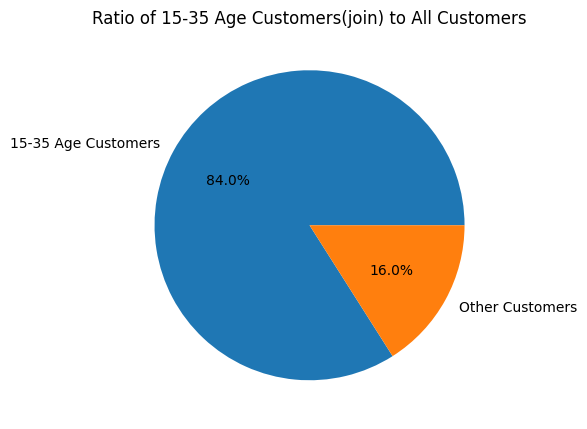

In [94]:
# 시각화
data = [age_join_15_35_ratio , 0.16 ]
labels = ['15-35 Age Customers', 'Other Customers']

plt.figure(figsize=(5,7))
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.title('Ratio of 15-35 Age Customers(join) to All Customers')
plt.show()

### 현재시점(15-35세 비율)

In [95]:
age_now_15_35 = customer_df[(customer_df['age_now'] >= 15) & (customer_df['age_now'] <= 35)]
age_now_15_35_cnt = len(age_now_15_35)
age_now_15_35_cnt
#현재시점 15세 이상 35세 이하인 고객 : 85703 명

85703

In [96]:
# 전체 고객 수
total_customer_cnt = customer_df['customer_id'].nunique()

age_now_15_35_ratio = np.round_(age_now_15_35_cnt / total_customer_cnt, decimals=2)

age_now_15_35_ratio

0.86

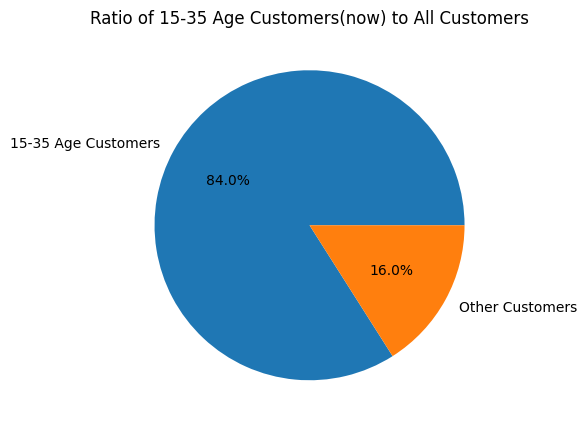

In [97]:
# 시각화
data = [age_join_15_35_ratio , 0.16 ]
labels = ['15-35 Age Customers', 'Other Customers']

plt.figure(figsize=(5,7))
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.title('Ratio of 15-35 Age Customers(now) to All Customers')
plt.show()

### 현재시점(세대별 비율)

In [107]:
# 현재(2022년) 기준으로 10대미만, 10대,20대,30대,40대,50대 이상으로 나눔 
bins= [0, 10, 20, 30, 40, 50, np.inf]
labels = ['under10','10s','20s','30s','40s','over50']
customer_df['AgeGroup'] = pd.cut(customer_df['age_now'], bins=bins, labels=labels, right=False)


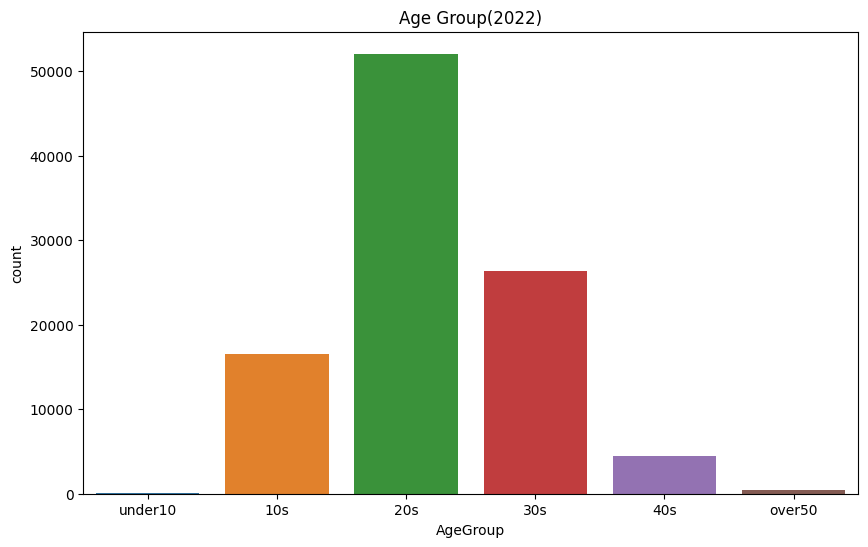

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(data=customer_df, x='AgeGroup', order= ['under10','10s','20s','30s','40s','over50'])
plt.title('Age Group(2022)')
plt.show()


##나이(현재시점)에 따른 제품 구매 추이

In [100]:
# 나이(현재시점)에 따른 제품 구매 추이

# transation,customer 데이터를 'customer_id' 컬럼 기준으로 병합
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = (trans_cust_df['item_price'] * trans_cust_df['quantity']- trans_cust_df['promo_amount'])

# 나이(출생연도)에 따른 매출액 및 판매횟수 총합 .
age_now_sales = trans_cust_df.groupby('age_now').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
age_now_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)

age_now_sales

,age_now,total_sales,sales_count
0,6,41600516,136
1,7,50573949,152
2,8,88415251,279
3,9,155832099,489
4,10,548562296,1474
5,11,1288885259,3699
6,12,2132722276,5693
7,13,3623478469,9909
8,14,6285049061,16892
9,15,7235625591,19433


In [103]:
# 나이(현재시점)에 따른 제품 구매 추이

# transation,customer 데이터를 'customer_id' 컬럼 기준으로 병합
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = (trans_cust_df['item_price'] * trans_cust_df['quantity']- trans_cust_df['promo_amount'])

# 나이에 따른 매출액 및 판매횟수 총합 .
age_now_sales = trans_cust_df.groupby('age_now').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
age_now_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)

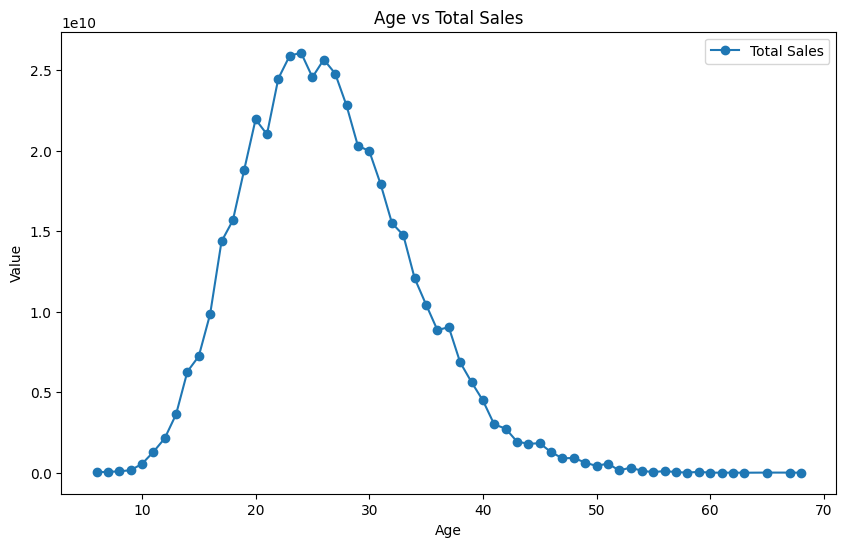

In [104]:
# 나이에 따른 총 구매액
plt.figure(figsize=(10, 6))

# 'total_sales' 그래프
plt.plot(age_now_sales['age_now'], age_now_sales['total_sales'], label='Total Sales', marker='o')

plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Age vs Total Sales')
plt.legend()

plt.show()


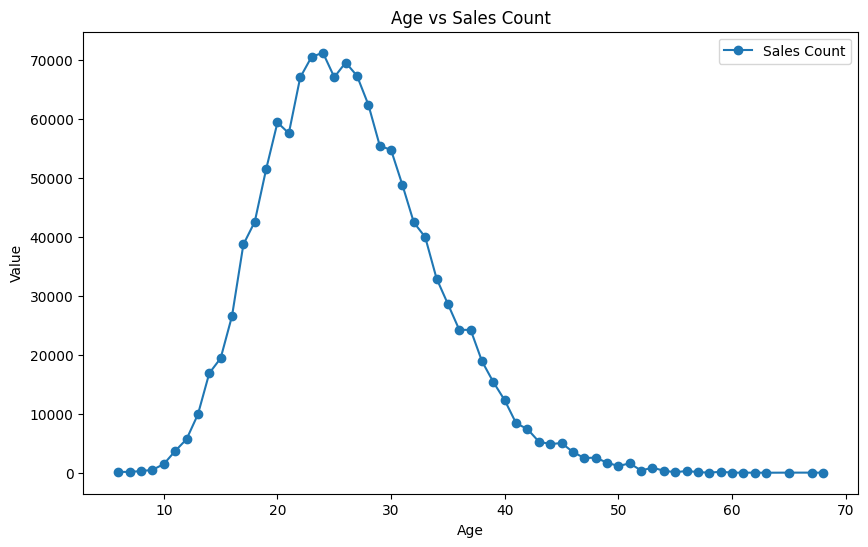

In [105]:
#나이에 따른 총 구매 횟수
# 'sales_count' 그래프
plt.figure(figsize=(10, 6))
plt.plot(age_now_sales['age_now'], age_now_sales['sales_count'], label='Sales Count', marker='o')
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Age vs Sales Count')
plt.legend()

plt.show()


##나이그룹(현재시점)에 따른 제품 구매 추이

In [116]:
# 'transaction_df'와 'customer_df' 머지
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = (trans_cust_df['item_price'] * trans_cust_df['quantity'] - trans_cust_df['promo_amount'])

# 'AgeGroup'에 따른 매출액 및 판매횟수 총합 계산
agegroup_sales = trans_cust_df.groupby('AgeGroup').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
agegroup_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)
agegroup_sales


,AgeGroup,total_sales,sales_count
0,under10,336421815,1056
1,10s,79826327429,216491
2,20s,237563475554,647979
3,30s,121079911767,330362
4,40s,19530947844,53591
5,over50,1851031737,5106


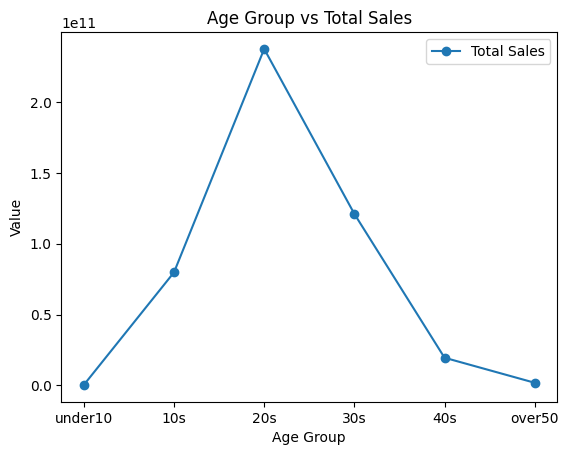

In [115]:
# 매출액(total_sales)와 판매 횟수(sales_count) 시각화
# 'total_sales' 그래프
plt.plot(agegroup_sales['AgeGroup'], agegroup_sales['total_sales'], label='Total Sales', marker='o')

plt.xlabel('Age Group')
plt.ylabel('Value')
plt.title('Age Group vs Total Sales')
plt.legend()

plt.show()


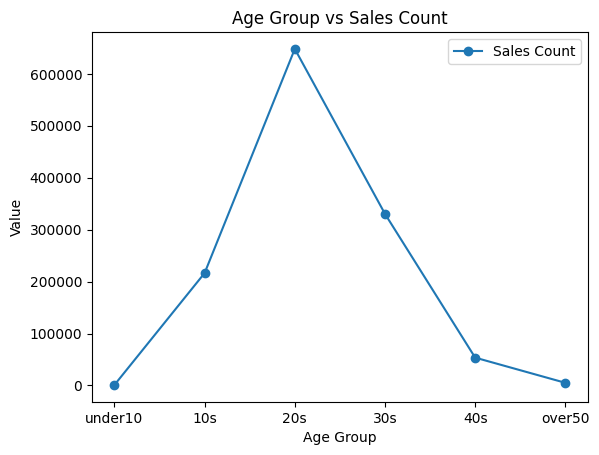

In [112]:
# 'sales_count' 그래프
plt.plot(agegroup_sales['AgeGroup'], agegroup_sales['sales_count'], label='Sales Count', marker='o')

plt.xlabel('Age Group')
plt.ylabel('Value')
plt.title('Age Group vs Sales Count')
plt.legend()

plt.show()